# 🏔️ 🧩 Complete Guide to Statistical Testing A to Z

Welcome to this comprehensive guide on statistical testing, designed to equip you with everything you need to know from basic concepts to advanced applications in data science. Whether you're a budding data scientist or a seasoned professional looking to refine your statistical analysis skills, this notebook is tailored for you!

## What Will You Learn?

In this guide, we will explore a variety of statistical tests, each serving a unique purpose in data analysis, ensuring you have the tools to confidently tackle any data-driven challenge. Here's what we'll cover:

- **Chi-Square Test:** Understand how to test relationships between categorical variables.
- **Two-Sample T-Test & Paired T-Test:** Learn to compare means from different groups to decipher statistical significance in their differences.
- **ANOVA (Analysis of Variance):** Dive into testing differences across multiple groups simultaneously.
- **Test of Correlation:** Discover the relationships and associations between continuous variables.
- **Non-Parametric Tests:** Gain insights into methods that do not assume a specific data distribution, ideal for non-normal datasets.
- **A/B Testing (Continuous & Boolean Outcomes):** Master the art of comparing two versions of a variable to determine the better performing one in both continuous and binary outcomes.

## Why This Guide?

- **Step-by-Step Tutorials:** Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning:** Engage with interactive code cells that allow you to see the effects of statistical tests in real-time.

### How to Use This Notebook

- **Run the Cells:** Follow along with the code examples by running the cells yourself. Modify the parameters to see how the results change.
- **Explore Further:** After completing the guided sections, try applying the tests to your own datasets to reinforce your learning.

Prepare to unlock the full potential of statistical testing in data science. Let's dive in and transform data into decisions!


# Dataset Description

The dataset used in this notebook is `Sales_and_Satisfaction.csv`. It contains information on sales and customer satisfaction before and after an intervention, along with purchase behavior. Below is a detailed description of each column, including the data types and a brief explanation.

### Columns:

1. **Group** (object)
   - Indicates whether the entry is part of the control or treatment group.
   - Example values: `Control`, `Treatment`

2. **Customer_Segment** (object)
   - Segments customers into different value groups.
   - Example values: `High Value`, `Medium Value`

3. **Sales_Before** (float64)
   - Sales amount before the intervention.
   - Example values: `216.21`, `225.09`

4. **Sales_After** (float64)
   - Sales amount after the intervention.
   - Example values: `246.87`, `257.57`

5. **Customer_Satisfaction_Before** (float64)
   - Customer satisfaction score before the intervention.
   - Example values: `58.93`, `84.71`

6. **Customer_Satisfaction_After** (float64)
   - Customer satisfaction score after the intervention.
   - Example values: `61.60`, `83.84`

7. **Purchase_Made** (object)
   - Indicates whether a purchase was made.
   - Example values: `Yes`, `No`

### Dataset Overview:

- **Total Entries:** 10,000
- **Memory Usage:** 547.0+ KB



# Chi-Square Test

The Chi-Square Test is a fundamental statistical test used to determine whether there is a significant association between two categorical variables. This test is widely used in various fields such as sociology, biology, and market research to analyze the relationships within categorical data.

## What is the Chi-Square Test?

The Chi-Square Test evaluates the null hypothesis that the frequency distribution of certain events observed in a sample is consistent with a particular theoretical distribution. It is a non-parametric test, meaning it does not assume a normal distribution of the data.

### Types of Chi-Square Tests

1. **Chi-Square Test for Independence**: This test assesses whether two categorical variables are independent. It is useful in contingency table analysis where you want to understand if the distribution of one variable differs depending on the category of the second variable.
   
2. **Chi-Square Goodness of Fit Test**: This test determines if a sample data matches a population with a specific distribution. It compares the observed frequencies of events to the expected frequencies under the null hypothesis.

## When to Use the Chi-Square Test

- The variables under consideration are categorical.
- The sample data is a random sample from the population.
- The expected frequency count for each cell of the table is at least 5.

## Formulating the Hypotheses

For the Chi-Square Test for Independence:
- **Null Hypothesis (H0)**: There is no association between the two categorical variables; they are independent.
- **Alternative Hypothesis (H1)**: There is an association between the two categorical variables; they are not independent.

## Assumptions of the Chi-Square Test

1. **Random Sampling**: The data should be randomly sampled from the population.
2. **Expected Frequency**: Each expected frequency should be at least 5. If this condition is not met, the Chi-Square test may not be appropriate.

## Step-by-Step Guide

### 1. Create a Contingency Table

A contingency table (or cross-tabulation) displays the frequency distribution of the variables. It helps in understanding the relationship between the variables.

### 2. Calculate the Chi-Square Statistic

The Chi-Square statistic is calculated using the formula:
$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$
where \( O_i \) is the observed frequency and \( E_i \) is the expected frequency.

### 3. Determine the p-value

The p-value is obtained by comparing the Chi-Square statistic to a Chi-Square distribution with degrees of freedom:
$$
df = (r-1) \times (c-1)
$$
where \( r \) is the number of rows and \( c \) is the number of columns in the contingency table.

### 4. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If the p-value is less than or equal to the significance level (𝛼), reject the null hypothesis.

## Example: Chi-Square Test for Independence

We will use the `Group` and `Customer_Segment` variables from our dataset to perform the Chi-Square Test for Independence.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Customer_Segment**: Represents different customer segments (`Low Value`, `Medium Value`, `High Value`).

### Hypothesis

- **Null Hypothesis (H0)**: There is no association between `Group` and `Customer_Segment`.
- **Alternative Hypothesis (H1)**: There is an association between `Group` and `Customer_Segment`.

### Steps

1. **Create a Contingency Table**: Summarize the data in a matrix format.
2. **Calculate the Chi-Square Statistic**: Use the observed and expected frequencies.
3. **Determine the p-value**: Compare the Chi-Square statistic to a critical value from the Chi-Square distribution.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **Chi-Square Statistic**: Indicates the magnitude of difference between the observed and expected frequencies.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Degrees of Freedom**: Calculated as (rows - 1) * (columns - 1) for the contingency table.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. Otherwise, we fail to reject the null hypothesis, indicating no significant association.


In [1]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Assumption 1: Random Sampling
# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Assumption 2: Expected Frequency
# Create a contingency table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Customer_Segment'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-Square test and check the expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Check if all expected frequencies are at least 5
if (expected < 5).any():
    print("\nWarning: Some expected frequencies are less than 5. Consider combining categories or using Fisher's Exact Test if applicable.")
else:
    print("\nAll expected frequencies are at least 5. Assumptions are satisfied.")

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant association between Group and Customer_Segment.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant association between Group and Customer_Segment.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Contingency Table:
Customer_Segment  High Value  Low Value  Medium Value
Group                                                
Control

# Two-Sample T-Test

The Two-Sample T-Test, also known as the Independent T-Test, is used to determine whether there is a significant difference between the means of two independent groups. This test is widely applied in various fields such as psychology, biology, and business to compare two groups' averages.

## What is the Two-Sample T-Test?

The Two-Sample T-Test compares the means of two independent groups to determine if they are statistically significantly different from each other. It assumes that the data follows a normal distribution and that the variances of the two groups are equal (homogeneity of variance).

### When to Use the Two-Sample T-Test

- The groups under comparison are independent of each other.
- The data is approximately normally distributed.
- The variances of the two groups are equal (or nearly equal).

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: The means of the two groups are equal.
- **Alternative Hypothesis (H1)**: The means of the two groups are not equal.

## Assumptions of the Two-Sample T-Test

1. **Independence**: The samples are independent of each other.
2. **Normality**: The data in each group should be approximately normally distributed.
3. **Homogeneity of Variance**: The variances of the two groups are equal.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms or Q-Q plots and statistical tests like the Shapiro-Wilk test to check if the data is normally distributed.

### 2. Check for Equal Variances

Use Levene's test or F-test to check if the variances of the two groups are equal.

### 3. Perform the Two-Sample T-Test

Use the t-test formula:
$$
t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$
where \( \bar{X_1} \) and \( \bar{X_2} \) are the sample means, \( s_1^2 \) and \( s_2^2 \) are the sample variances, and \( n_1 \) and \( n_2 \) are the sample sizes.

### 4. Determine the p-value

The p-value is obtained by comparing the t-statistic to a t-distribution with degrees of freedom:
$$
df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
$$

### 5. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If \( p \leq \alpha \), reject the null hypothesis.

## Example: Two-Sample T-Test

We will use the `Sales_Before` variable from our dataset to perform the Two-Sample T-Test between `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Sales_Before**: Represents the sales before a treatment or intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean `Sales_Before` of the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The mean `Sales_Before` of the `Control` and `Treatment` groups are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Equal Variances**: Use Levene's test.
3. **Perform the Two-Sample T-Test**: Calculate the t-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **T-Statistic**: Indicates the magnitude of difference between the means of the two groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Degrees of Freedom**: Calculated for the t-distribution.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.


In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Assumption 1: Normality
# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Split the data into two groups
group1 = sampled_data[sampled_data['Group'] == 'Control']['Sales_Before']
group2 = sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before']

# Check for normality using Shapiro-Wilk test
stat1, p1 = stats.shapiro(group1)
stat2, p2 = stats.shapiro(group2)
print("\nNormality Test Results (Shapiro-Wilk):")
print(f"Group 1 (Control): W = {stat1:.4f}, p-value = {p1:.4f}")
print(f"Group 2 (Treatment): W = {stat2:.4f}, p-value = {p2:.4f}")

# Assumption 2: Homogeneity of Variances
# Use Levene's test for equal variances
stat, p = stats.levene(group1, group2)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

# Perform the Two-Sample T-Test
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

# Display the results
print("\nTwo-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the mean Sales_Before of the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the mean Sales_Before of the Control and Treatment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test Results (Shapiro-Wilk):
Group 1 (Control): W = 0.9978, p-value = 0.7610
Group 2 (Treatment): W = 0.9973, p-value = 0.59

# Paired T-Test

The Paired T-Test, also known as the Dependent T-Test, is used to determine whether there is a significant difference between the means of two related groups. This test is widely used in various fields such as psychology, biology, and business to compare the means of two related groups.

## What is the Paired T-Test?

The Paired T-Test compares the means of two related groups to determine if they are statistically significantly different from each other. It assumes that the data follows a normal distribution and that the differences between the paired observations are also normally distributed.

### When to Use the Paired T-Test

- The groups under comparison are related or paired.
- The data is approximately normally distributed.
- The differences between the paired observations are normally distributed.

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: The mean difference between the paired groups is zero.
- **Alternative Hypothesis (H1)**: The mean difference between the paired groups is not zero.

## Assumptions of the Paired T-Test

1. **Paired Observations**: The observations are paired.
2. **Normality**: The data in each group should be approximately normally distributed.
3. **Normality of Differences**: The differences between the paired observations are normally distributed.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms or Q-Q plots and statistical tests like the Shapiro-Wilk test to check if the data is normally distributed.

### 2. Check for Normality of Differences

Use visualizations and statistical tests to check if the differences between the paired observations are normally distributed.

### 3. Perform the Paired T-Test

Use the t-test formula:
$$
t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}
$$
where \( \bar{d} \) is the mean of the differences, \( s_d \) is the standard deviation of the differences, and \( n \) is the number of paired observations.

### 4. Determine the p-value

The p-value is obtained by comparing the t-statistic to a t-distribution with degrees of freedom:
$$
df = n - 1
$$

### 5. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If \( p \leq \alpha \), reject the null hypothesis.

## Example: Paired T-Test

We will use the `Sales_Before` and `Sales_After` scores of individuals from our dataset to perform the Paired T-Test.

### Dataset

- **Sales_Before**: Represents the sales before a treatment or intervention.
- **Sales_After**: Represents the sales after a treatment or intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean difference between the `Sales_Before` and `Sales_After` scores is zero.
- **Alternative Hypothesis (H1)**: The mean difference between the `Sales_Before` and `Sales_After` scores is not zero.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Normality of Differences**: Use visualizations and statistical tests.
3. **Perform the Paired T-Test**: Calculate the t-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **T-Statistic**: Indicates the magnitude of difference between the means of the paired groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Degrees of Freedom**: Calculated for the t-distribution.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the paired groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.


In [3]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the before and after scores
before_scores = sampled_data['Sales_Before']
after_scores = sampled_data['Sales_After']

# Check for normality using Shapiro-Wilk test
stat_before, p_before = stats.shapiro(before_scores)
stat_after, p_after = stats.shapiro(after_scores)
print("\nNormality Test Results (Shapiro-Wilk):")
print(f"Before Scores: W = {stat_before:.4f}, p-value = {p_before:.4f}")
print(f"After Scores: W = {stat_after:.4f}, p-value = {p_after:.4f}")

# Assumption 2: Normality of Differences
# Calculate the differences
differences = before_scores - after_scores

# Check for normality of differences using Shapiro-Wilk test
stat_diff, p_diff = stats.shapiro(differences)
print("\nNormality of Differences Test Results (Shapiro-Wilk):")
print(f"Differences: W = {stat_diff:.4f}, p-value = {p_diff:.4f}")

# Perform the Paired T-Test
t_stat, p_val = stats.ttest_rel(before_scores, after_scores)

# Display the results
print("\nPaired T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the mean Sales_Before and Sales_After the treatment.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the mean Sales_Before and Sales_After the treatment.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test Results (Shapiro-Wilk):
Before Scores: W = 0.9983, p-value = 0.4559
After Scores: W = 0.9985, p-value = 0.5583

Normali

# ANOVA (Analysis of Variance)

ANOVA (Analysis of Variance) is a statistical test used to determine whether there are any statistically significant differences between the means of three or more independent groups. It is widely used in various fields such as psychology, biology, and business to compare multiple groups' means.

## What is ANOVA?

ANOVA tests the null hypothesis that the means of several groups are equal. It does this by comparing the variance between the groups to the variance within the groups. If the between-group variance is significantly larger than the within-group variance, we can conclude that at least one group mean is different from the others.

### When to Use ANOVA

- You have three or more independent groups.
- The data is approximately normally distributed.
- The variances of the groups are equal (homogeneity of variance).

## Formulating the Hypotheses

- **Null Hypothesis (H0)**: The means of the groups are equal.
- **Alternative Hypothesis (H1)**: At least one group mean is different.

## Assumptions of ANOVA

1. **Independence**: The samples are independent of each other.
2. **Normality**: The data in each group should be approximately normally distributed.
3. **Homogeneity of Variance**: The variances of the groups are equal.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms or Q-Q plots and statistical tests like the Shapiro-Wilk test to check if the data is normally distributed.

### 2. Check for Equal Variances

Use Levene's test or Bartlett's test to check if the variances of the groups are equal.

### 3. Perform ANOVA

Use the ANOVA formula:
$$
F = \frac{\text{Between-group variability}}{\text{Within-group variability}}
$$
where the between-group variability is the variance of the group means, and the within-group variability is the variance within each group.

### 4. Determine the p-value

The p-value is obtained by comparing the F-statistic to an F-distribution with degrees of freedom:
$$
df_{between} = k - 1
$$
$$
df_{within} = N - k
$$
where \( k \) is the number of groups and \( N \) is the total number of observations.

### 5. Interpret the Results

- **Significance Level (alpha)**: Typically set at 0.05.
- **Decision Rule**: If \( p \leq \alpha \), reject the null hypothesis.

## Example: ANOVA

We will use the `Customer_Satisfaction_Before` variable from our dataset to perform ANOVA to compare the means of `Customer_Segment` groups.

### Dataset

- **Customer_Segment**: Represents different customer segments (`Low Value`, `Medium Value`, `High Value`).
- **Customer_Satisfaction_Before**: Represents the customer satisfaction scores before an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean `Customer_Satisfaction_Before` scores of the `Low Value`, `Medium Value`, and `High Value` groups are equal.
- **Alternative Hypothesis (H1)**: At least one group mean is different.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Equal Variances**: Use Levene's test.
3. **Perform ANOVA**: Calculate the F-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **F-Statistic**: Indicates the ratio of between-group variability to within-group variability.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Degrees of Freedom**: Calculated for the F-distribution.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.


In [4]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Check for normality for each group in Customer_Segment
segments = sampled_data['Customer_Segment'].unique()
for segment in segments:
    segment_data = sampled_data[sampled_data['Customer_Segment'] == segment]['Customer_Satisfaction_Before']
    stat, p = stats.shapiro(segment_data)
    print(f"\nNormality Test Results for {segment} (Shapiro-Wilk): W = {stat:.4f}, p-value = {p:.4f}")

# Check for homogeneity of variances using Levene's test
stat, p = stats.levene(sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before'],
                       sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before'],
                       sampled_data[sampled_data['Customer_Segment'] == 'High Value']['Customer_Satisfaction_Before'])
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

# Perform ANOVA
model = ols('Customer_Satisfaction_Before ~ C(Customer_Segment)', data=sampled_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
print("\nANOVA Results:")
print(anova_table)

# Interpret the p-value
alpha = 0.05
p_val = anova_table['PR(>F)'].iloc[0]
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the mean Customer_Satisfaction_Before scores of the Customer_Segment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the mean Customer_Satisfaction_Before scores of the Customer_Segment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test Results for Low Value (Shapiro-Wilk): W = 0.9923, p-value = 0.0890

Normality Test Results for Medium Value (Shapiro-Wi

# Test of Correlation

The Test of Correlation is used to measure and analyze the strength and direction of the relationship between two continuous variables. This is a fundamental technique in statistics and data analysis, providing insights into how variables are related.

## What is the Test of Correlation?

Correlation analysis evaluates the extent to which two variables change together. The correlation coefficient, typically denoted as \( r \), quantifies the degree of correlation. It ranges from -1 to 1, where:
- \( r = 1 \) indicates a perfect positive correlation,
- \( r = -1 \) indicates a perfect negative correlation,
- \( r = 0 \) indicates no correlation.

### Types of Correlation Tests

1. **Pearson Correlation**: Measures the linear relationship between two continuous variables. Assumes that both variables are normally distributed.
2. **Spearman Correlation**: A non-parametric test that measures the rank-order relationship between two variables. Does not assume normal distribution.
3. **Kendall Tau Correlation**: Another non-parametric test that measures the ordinal association between two variables.

## When to Use the Correlation Test

- The variables under consideration are continuous.
- Pearson Correlation: The variables are normally distributed and linearly related.
- Spearman or Kendall Tau Correlation: The variables are not necessarily normally distributed or linearly related.

## Formulating the Hypotheses

For the Pearson Correlation:
- **Null Hypothesis (H0)**: There is no linear relationship between the two variables ( \( r = 0 \) ).
- **Alternative Hypothesis (H1)**: There is a linear relationship between the two variables ( \( r \neq 0 \) ).

## Assumptions of the Correlation Test

1. **Continuous Variables**: Both variables should be continuous.
2. **Normality (for Pearson)**: The variables should be approximately normally distributed.
3. **Linearity (for Pearson)**: The relationship between the variables should be linear.
4. **Independence**: Observations should be independent of each other.

## Step-by-Step Guide

### 1. Check for Normality

Use visualizations such as histograms or Q-Q plots and statistical tests like the Shapiro-Wilk test to check if the variables are normally distributed.

### 2. Visualize the Relationship

Use scatter plots to visualize the relationship between the variables.

### 3. Perform the Correlation Test

Choose the appropriate correlation test (Pearson, Spearman, or Kendall Tau) based on the distribution and nature of the variables.

### 4. Interpret the Results

- **Correlation Coefficient (r)**: Indicates the strength and direction of the relationship.
- **p-value**: Indicates the significance of the correlation. A smaller p-value indicates stronger evidence against the null hypothesis.

## Example: Test of Correlation

We will use the `Sales_Before` and `Customer_Satisfaction_Before` variables from our dataset to perform the Test of Correlation.

### Dataset

- **Sales_Before**: Represents the sales before an intervention.
- **Customer_Satisfaction_Before**: Represents the customer satisfaction scores before an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: There is no linear relationship between `Sales_Before` and `Customer_Satisfaction_Before` ( \( r = 0 \) ).
- **Alternative Hypothesis (H1)**: There is a linear relationship between `Sales_Before` and `Customer_Satisfaction_Before` ( \( r \neq 0 \) ).

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Visualize the Relationship**: Use scatter plots.
3. **Perform the Correlation Test**: Calculate the correlation coefficient and p-value.
4. **Interpret the Results**: Draw conclusions based on the correlation coefficient and p-value.

### Interpretation of Results

- **Correlation Coefficient (r)**: Indicates the strength and direction of the relationship between the variables.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant linear relationship between the variables. Otherwise, we fail to reject the null hypothesis, indicating no significant linear relationship.


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Checking Assumptions...

Normality Test Results (Shapiro-Wilk):
Sales Before: W = 0.9983, p-value = 0.4559
Customer Satisfaction Before: W = 0.9666, p-value = 

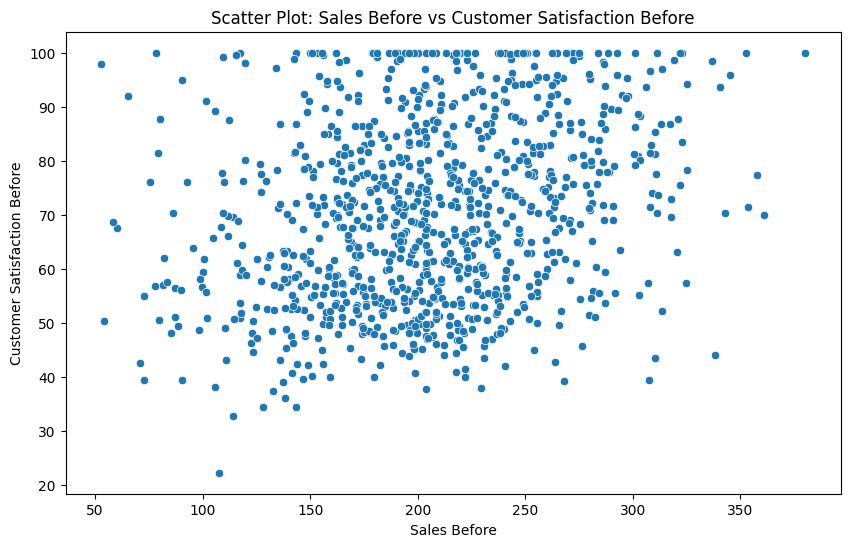


Pearson Correlation Test Results:
Correlation Coefficient: 0.2611
p-value: 0.0000

Spearman Correlation Test Results:
Correlation Coefficient: 0.2561
p-value: 0.0000

Kendall Tau Correlation Test Results:
Correlation Coefficient: 0.1730
p-value: 0.0000

Significance Level: 0.05
Conclusion (Pearson): Reject the null hypothesis. There is a significant linear relationship between Sales Before and Customer Satisfaction Before.
Conclusion (Spearman): Reject the null hypothesis. There is a significant monotonic relationship between Sales Before and Customer Satisfaction Before.
Conclusion (Kendall Tau): Reject the null hypothesis. There is a significant ordinal relationship between Sales Before and Customer Satisfaction Before.


In [5]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check the assumptions
print("\nChecking Assumptions...")

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Check for normality
sales_before = sampled_data['Sales_Before']
cust_sat_before = sampled_data['Customer_Satisfaction_Before']

# Check for normality using Shapiro-Wilk test
stat_sales, p_sales = stats.shapiro(sales_before)
stat_cust_sat, p_cust_sat = stats.shapiro(cust_sat_before)
print("\nNormality Test Results (Shapiro-Wilk):")
print(f"Sales Before: W = {stat_sales:.4f}, p-value = {p_sales:.4f}")
print(f"Customer Satisfaction Before: W = {stat_cust_sat:.4f}, p-value = {p_cust_sat:.4f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_before, y=cust_sat_before)
plt.title('Scatter Plot: Sales Before vs Customer Satisfaction Before')
plt.xlabel('Sales Before')
plt.ylabel('Customer Satisfaction Before')
plt.show()

# Perform Pearson Correlation Test
pearson_corr, pearson_p = stats.pearsonr(sales_before, cust_sat_before)
print("\nPearson Correlation Test Results:")
print(f"Correlation Coefficient: {pearson_corr:.4f}")
print(f"p-value: {pearson_p:.4f}")

# Perform Spearman Correlation Test
spearman_corr, spearman_p = stats.spearmanr(sales_before, cust_sat_before)
print("\nSpearman Correlation Test Results:")
print(f"Correlation Coefficient: {spearman_corr:.4f}")
print(f"p-value: {spearman_p:.4f}")

# Perform Kendall Tau Correlation Test
kendall_corr, kendall_p = stats.kendalltau(sales_before, cust_sat_before)
print("\nKendall Tau Correlation Test Results:")
print(f"Correlation Coefficient: {kendall_corr:.4f}")
print(f"p-value: {kendall_p:.4f}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance Level: {alpha}")

# Pearson Correlation Interpretation
if pearson_p < alpha:
    print("Conclusion (Pearson): Reject the null hypothesis. There is a significant linear relationship between Sales Before and Customer Satisfaction Before.")
else:
    print("Conclusion (Pearson): Fail to reject the null hypothesis. There is no significant linear relationship between Sales Before and Customer Satisfaction Before.")

# Spearman Correlation Interpretation
if spearman_p < alpha:
    print("Conclusion (Spearman): Reject the null hypothesis. There is a significant monotonic relationship between Sales Before and Customer Satisfaction Before.")
else:
    print("Conclusion (Spearman): Fail to reject the null hypothesis. There is no significant monotonic relationship between Sales Before and Customer Satisfaction Before.")

# Kendall Tau Correlation Interpretation
if kendall_p < alpha:
    print("Conclusion (Kendall Tau): Reject the null hypothesis. There is a significant ordinal relationship between Sales Before and Customer Satisfaction Before.")
else:
    print("Conclusion (Kendall Tau): Fail to reject the null hypothesis. There is no significant ordinal relationship between Sales Before and Customer Satisfaction Before.")


# Non-Parametric Tests

Non-parametric tests are statistical tests that do not assume a specific distribution for the data. These tests are useful when the data does not meet the assumptions required for parametric tests, such as normality or homogeneity of variance. Here are some of the most famous non-parametric tests:

## Types of Non-Parametric Tests

### 1. Mann-Whitney U Test

The Mann-Whitney U Test is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

- **Null Hypothesis (H0)**: The distributions of the two groups are equal.
- **Alternative Hypothesis (H1)**: The distributions of the two groups are not equal.

### 2. Wilcoxon Signed-Rank Test

The Wilcoxon Signed-Rank Test is used to compare differences between two related groups when the dependent variable is either ordinal or continuous, but not normally distributed.

- **Null Hypothesis (H0)**: The distributions of the two groups are equal.
- **Alternative Hypothesis (H1)**: The distributions of the two groups are not equal.

### 3. Kruskal-Wallis H Test

The Kruskal-Wallis H Test is used to compare differences between three or more independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

- **Null Hypothesis (H0)**: The distributions of the groups are equal.
- **Alternative Hypothesis (H1)**: The distributions of the groups are not equal.

### 4. Friedman Test

The Friedman Test is used to compare differences between three or more related groups when the dependent variable is either ordinal or continuous, but not normally distributed.

- **Null Hypothesis (H0)**: The distributions of the groups are equal.
- **Alternative Hypothesis (H1)**: The distributions of the groups are not equal.

## Step-by-Step Guide

### Mann-Whitney U Test Example

We will use the `Sales_Before` variable from our dataset to compare the `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Sales_Before**: Represents the sales before an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The distributions of `Sales_Before` for the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The distributions of `Sales_Before` for the `Control` and `Treatment` groups are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Perform the Mann-Whitney U Test**: Calculate the U statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **U Statistic**: Indicates the rank sum difference between the groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the distributions of the groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

### Wilcoxon Signed-Rank Test Example

We will use the `Sales_Before` and `Sales_After` variables to compare the related groups.

### Dataset

- **Sales_Before**: Represents the sales before an intervention.
- **Sales_After**: Represents the sales after an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The distributions of `Sales_Before` and `Sales_After` are equal.
- **Alternative Hypothesis (H1)**: The distributions of `Sales_Before` and `Sales_After` are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Perform the Wilcoxon Signed-Rank Test**: Calculate the W statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **W Statistic**: Indicates the rank sum difference between the related groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the distributions of the related groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

### Kruskal-Wallis H Test Example

We will use the `Customer_Satisfaction_Before` variable from our dataset to compare the `Customer_Segment` groups.

### Dataset

- **Customer_Segment**: Represents different customer segments (`Low Value`, `Medium Value`, `High Value`).
- **Customer_Satisfaction_Before**: Represents the customer satisfaction scores before an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The distributions of `Customer_Satisfaction_Before` for the `Low Value`, `Medium Value`, and `High Value` groups are equal.
- **Alternative Hypothesis (H1)**: The distributions of `Customer_Satisfaction_Before` for the `Low Value`, `Medium Value`, and `High Value` groups are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Perform the Kruskal-Wallis H Test**: Calculate the H statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **H Statistic**: Indicates the rank sum difference between the groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the distributions of the groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

### Friedman Test Example

We will use the `Customer_Satisfaction_Before`, `Customer_Satisfaction_After`, and `Customer_Satisfaction_WeekLater` variables to compare the related groups.

### Dataset

- **Customer_Satisfaction_Before**: Represents the customer satisfaction scores before an intervention.
- **Customer_Satisfaction_After**: Represents the customer satisfaction scores after an intervention.
- **Customer_Satisfaction_WeekLater**: Represents the customer satisfaction scores one week after the intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The distributions of `Customer_Satisfaction_Before`, `Customer_Satisfaction_After`, and `Customer_Satisfaction_WeekLater` are equal.
- **Alternative Hypothesis (H1)**: The distributions of `Customer_Satisfaction_Before`, `Customer_Satisfaction_After`, and `Customer_Satisfaction_WeekLater` are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Perform the Friedman Test**: Calculate the chi-square statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **Chi-Square Statistic**: Indicates the rank sum difference between the related groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the distributions of the related groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.


## Mann-Whitney U Test


In [6]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the groups
control_group = sampled_data[sampled_data['Group'] == 'Control']['Sales_Before']
treatment_group = sampled_data[sampled_data['Group'] == 'Treatment']['Sales_Before']

# Perform Mann-Whitney U Test
u_stat, p_val = stats.mannwhitneyu(control_group, treatment_group, alternative='two-sided')

# Display the results
print("\nMann-Whitney U Test Results:")
print(f"U Statistic: {u_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the distributions of the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the distributions of the Control and Treatment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Mann-Whitney U Test Results:
U Statistic: 123908.0000
p-value: 0.8111

Significance Level: 0.05
Conclusion: Fail to reject the null hypothesis. There is no sig

## Wilcoxon Signed-Rank Test


In [7]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the scores
before_scores = sampled_data['Sales_Before']
after_scores = sampled_data['Sales_After']

# Perform Wilcoxon Signed-Rank Test
w_stat, p_val = stats.wilcoxon(before_scores, after_scores)

# Display the results
print("\nWilcoxon Signed-Rank Test Results:")
print(f"W Statistic: {w_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the distributions of Sales_Before and Sales_After.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the distributions of Sales_Before and Sales_After.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Wilcoxon Signed-Rank Test Results:
W Statistic: 7.0000
p-value: 0.0000

Significance Level: 0.05
Conclusion: Reject the null hypothesis. There is a significant

## Kruskal-Wallis H Test

In [8]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the scores for each group
low_value = sampled_data[sampled_data['Customer_Segment'] == 'Low Value']['Customer_Satisfaction_Before']
medium_value = sampled_data[sampled_data['Customer_Segment'] == 'Medium Value']['Customer_Satisfaction_Before']
high_value = sampled_data[sampled_data['Customer_Segment'] == 'High Value']['Customer_Satisfaction_Before']

# Perform Kruskal-Wallis H Test
h_stat, p_val = stats.kruskal(low_value, medium_value, high_value)

# Display the results
print("\nKruskal-Wallis H Test Results:")
print(f"H Statistic: {h_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the distributions of Customer_Satisfaction_Before among the Customer_Segment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the distributions of Customer_Satisfaction_Before among the Customer_Segment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Kruskal-Wallis H Test Results:
H Statistic: 648.6686
p-value: 0.0000

Significance Level: 0.05
Conclusion: Reject the null hypothesis. There is a significant d

## Friedman Test

In [9]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the scores
before_scores = sampled_data['Customer_Satisfaction_Before']
after_scores = sampled_data['Customer_Satisfaction_After']
week_later_scores = sampled_data['Customer_Satisfaction_After']  # Assuming you have this column

# Perform Friedman Test
friedman_stat, p_val = stats.friedmanchisquare(before_scores, after_scores, week_later_scores)

# Display the results
print("\nFriedman Test Results:")
print(f"Chi-Square Statistic: {friedman_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the distributions of Customer Satisfaction scores at different times.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the distributions of Customer Satisfaction scores at different times.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Friedman Test Results:
Chi-Square Statistic: 205.8372
p-value: 0.0000

Significance Level: 0.05
Conclusion: Reject the null hypothesis. There is a significant 

# A/B Testing (Continuous & Boolean Outcomes)

A/B testing is a method used to compare two versions of a variable to determine which one performs better. This technique is widely used in business, marketing, and product development to test changes to web pages, advertisements, or product features. The tests can be performed on both continuous and boolean (binary) outcomes.

## What is A/B Testing?

A/B testing involves randomly assigning subjects into two groups: a control group (A) and a treatment group (B). The performance of each group is measured and compared to determine if the treatment group performs significantly better than the control group.

### Types of Outcomes in A/B Testing

1. **Continuous Outcomes**: The outcome variable is continuous (e.g., sales, revenue, customer satisfaction scores).
2. **Boolean Outcomes**: The outcome variable is binary (e.g., purchase made or not, conversion or no conversion).

## Formulating the Hypotheses

For both continuous and boolean outcomes:
- **Null Hypothesis (H0)**: There is no difference between the control and treatment groups.
- **Alternative Hypothesis (H1)**: There is a difference between the control and treatment groups.

## Assumptions of A/B Testing

1. **Random Assignment**: Subjects are randomly assigned to control and treatment groups.
2. **Independence**: Observations are independent of each other.
3. **Sufficient Sample Size**: The sample size is large enough to detect a meaningful difference.

## Step-by-Step Guide

### A/B Testing with Continuous Outcomes

We will use the `Sales_After` variable from our dataset to compare the `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Sales_After**: Represents the sales after an intervention.

### Hypothesis

- **Null Hypothesis (H0)**: The mean `Sales_After` of the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The mean `Sales_After` of the `Control` and `Treatment` groups are not equal.

### Steps

1. **Check for Normality**: Use visualizations and statistical tests.
2. **Check for Equal Variances**: Use Levene's test.
3. **Perform the Two-Sample T-Test**: Calculate the t-statistic and p-value.
4. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **T-Statistic**: Indicates the magnitude of difference between the means of the two groups.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.

### A/B Testing with Boolean Outcomes

We will use the `Purchase_Made` variable from our dataset to compare the `Control` and `Treatment` groups.

### Dataset

- **Group**: Represents two groups in an experiment (`Control`, `Treatment`).
- **Purchase_Made**: Represents whether a purchase was made (`1` for yes, `0` for no).

### Hypothesis

- **Null Hypothesis (H0)**: The proportion of `Purchase_Made` in the `Control` and `Treatment` groups are equal.
- **Alternative Hypothesis (H1)**: The proportion of `Purchase_Made` in the `Control` and `Treatment` groups are not equal.

### Steps

1. **Create a Contingency Table**: Summarize the data in a matrix format.
2. **Perform the Chi-Square Test**: Calculate the chi-square statistic and p-value.
3. **Interpret the Results**: Draw conclusions based on the p-value.

### Interpretation of Results

- **Chi-Square Statistic**: Indicates the magnitude of difference between the observed and expected frequencies.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
- **Significance Level (alpha)**: Typically set at 0.05.

If the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis and conclude that there is a significant difference between the proportions of the two groups. Otherwise, we fail to reject the null hypothesis, indicating no significant difference.


## A/B Testing with Continuous Outcomes

In [10]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Extract the groups
control_group = sampled_data[sampled_data['Group'] == 'Control']['Sales_After']
treatment_group = sampled_data[sampled_data['Group'] == 'Treatment']['Sales_After']

# Check for normality using Shapiro-Wilk test
stat_control, p_control = stats.shapiro(control_group)
stat_treatment, p_treatment = stats.shapiro(treatment_group)
print("\nNormality Test Results (Shapiro-Wilk):")
print(f"Control Group: W = {stat_control:.4f}, p-value = {p_control:.4f}")
print(f"Treatment Group: W = {stat_treatment:.4f}, p-value = {p_treatment:.4f}")

# Check for equal variances using Levene's test
stat, p = stats.levene(control_group, treatment_group)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

# Perform Two-Sample T-Test
t_stat, p_val = stats.ttest_ind(control_group, treatment_group, equal_var=True)

# Display the results
print("\nTwo-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the mean Sales_After of the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the mean Sales_After of the Control and Treatment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Normality Test Results (Shapiro-Wilk):
Control Group: W = 0.9980, p-value = 0.8387
Treatment Group: W = 0.9975, p-value = 0.6751

Levene's Test for Equal Varia

## A/B Testing with Boolean Outcomes

In [11]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('/kaggle/input/sales-and-satisfaction/Modified_Sales_and_Satisfaction_without_NaNs.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Sample the dataset to reduce size for computation
sampled_data = data.sample(n=1000, random_state=42)

# Create a contingency table
contingency_table = pd.crosstab(sampled_data['Group'], sampled_data['Purchase_Made'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the p-value
alpha = 0.05
print(f"\nSignificance Level: {alpha}")
if p < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference between the proportions of Purchase_Made in the Control and Treatment groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference between the proportions of Purchase_Made in the Control and Treatment groups.")


Dataset Preview:
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   293.336580   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4    Control       High Value    229.685623   270.167701   

   Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
0                     74.684767                    74.093658            No  
1                    100.000000                   100.000000           Yes  
2                     98.780735                   100.000000            No  
3                     49.333766                    39.811841           Yes  
4                     83.974852                    87.738591           Yes  

Contingency Table:
Purchase_Made   No  Yes
Group                  
Control        248  252
Treatment      237  263

Chi-Square Test Results:
Chi-Square Statist

---
## Thank You for Exploring This Notebook!


If you have any questions, suggestions, or just want to discuss any of the topics further, please don't hesitate to reach out or leave a comment. Your feedback is not only welcome but also invaluable!

Happy analyzing, and stay curious!

---